## Project: MNIST handwritten numbers classification with keras

### Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from IPython.core.pylabtools import figsize

### Pre-processing and analyses

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
type(x_train)

numpy.ndarray

In [7]:
'''
x_train.shape
60 thousand images
28x28 pixels

y_train.shape
60 thousand labels
'''
print(x_train.shape,
      y_train.shape,
      x_test.shape,
      y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [8]:
# print an image with print function
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

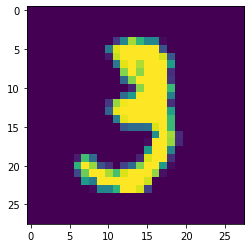

label: 3


In [10]:
# displaying the image with plt function
plt.imshow(x_train[10])
plt.show()
print('label: {}'.format(y_train[10]))

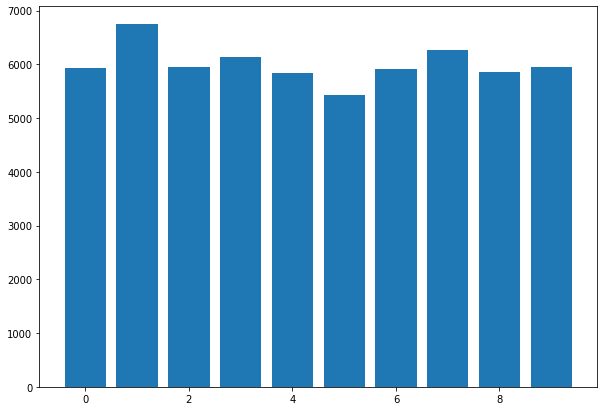

In [25]:
# unique and count values in y_train
unique, counts = np.unique(y_train, return_counts=True)
y_train_count = dict(zip(unique, counts))
figsize(10,7)
plt.bar(*zip(*y_train_count.items()))
plt.show()

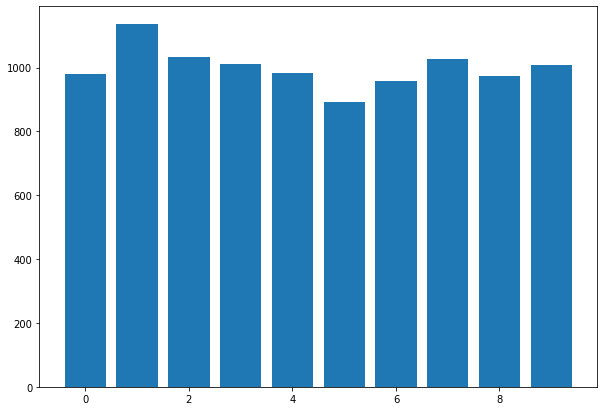

In [27]:
# unique and count_values in y_test
unique, counts = np.unique(y_test, return_counts=True)
y_test_count = dict(zip(unique,counts))
figsize=(10,7)
plt.bar(*zip(*y_test_count.items()))
plt.show()

In [28]:
# scaling the values of the grey scale from 0-255 to 0-1
x_train = x_train/255
x_test = x_test/255

In [29]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

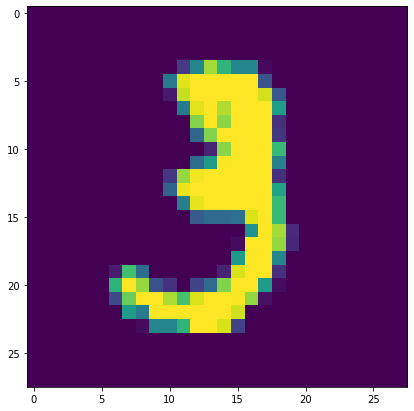

label: 3


In [32]:
plt.imshow(x_train[10])
plt.show()
print('label: {}'.format(y_train[10]))

### Building the Neural Network

In [36]:
'''
Flatten, 'flats' a matrix, it makes a matrix n-dimensional into 1-dimensional array

with sigmoid activation function in the output layer, it's possible to
take a probability of the predicted number
'''
model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(50, activation='relu'),
                         keras.layers.Dense(50, activation='relu'),
                         keras.layers.Dense(10, activation='sigmoid')
])

# compiling the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# training the model
model.fit(x = x_train,
          y = y_train,
          epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2995 - accuracy: 0.9129
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1449 - accuracy: 0.9566
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1076 - accuracy: 0.9672
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0858 - accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0722 - accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0610 - accuracy: 0.9803
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0510 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0457 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0399 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

In [44]:
# testing the model
loss, accuracy = model.evaluate(x_test, y_test)
print('''
Training data accuracy: 98,86%
Test data accuracy: {:.2f}%
'''.format(accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.1116 - accuracy: 0.9713

Training data accuracy: 98,86%
Test data accuracy: 97.13%



In [45]:
y_pred = model.predict(x_test)

In [48]:
print(y_pred[0])

[8.9564378e-07 1.2230769e-01 2.4091181e-01 2.4016243e-01 8.0547153e-08
 2.2377968e-03 2.8823952e-09 1.0000000e+00 4.2265654e-04 6.9494247e-01]


In [62]:
# converting the probabilities into categorical labels
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 7, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

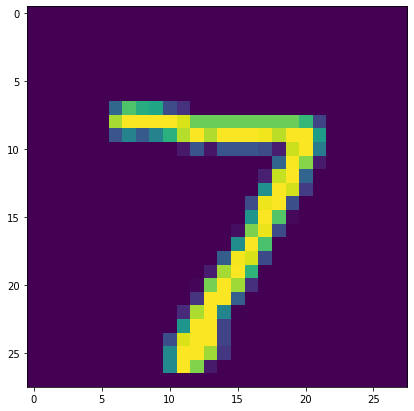


y_test: 7
y_pred: 7



In [64]:
plt.imshow(x_test[0])
plt.show()
print('''
y_test: {}
y_pred: {}
'''.format(y_test[0], y_pred_label[0]))

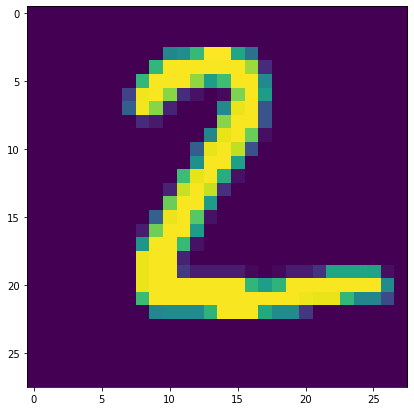


y_test: 2
y_pred: 2



In [65]:
plt.imshow(x_test[1])
plt.show()
print('''
y_test: {}
y_pred: {}
'''.format(y_test[1], y_pred_label[1]))

In [93]:
conf_mat = confusion_matrix(y_test, y_pred_label)
print(conf_mat)

tf.Tensor(
[[ 972    0    0    2    0    1    1    2    2    0]
 [   0 1124    3    2    0    1    2    0    3    0]
 [   3    0 1002    2    6    2    4    7    5    1]
 [   0    1    6  980    1    3    0    8    7    4]
 [   2    0    3    1  967    0    1    3    1    4]
 [   5    0    1   20    2  848    6    2    6    2]
 [   8    1    2    0    9    7  926    0    5    0]
 [   2    4   12    2    2    1    0  997    6    2]
 [   6    0   12    4    3    5    2    3  938    1]
 [   3    2    1    3   26    2    0   12    4  956]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted labels')

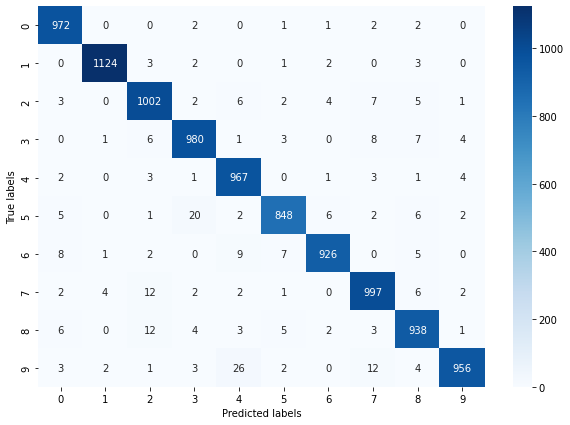

In [96]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

### Acknowledgements
<p>Project 2. MNIST Digit Classification with Neural Network from Siddhardhan: https://www.youtube.com/watch?v=Vlc-iBQoNMw</p>